In [11]:
import utils
import numpy as np
import sklearn
from collections import defaultdict
import matplotlib.pyplot as plt

The point of this notebook is to try something different. In the real world, you will rarely have a fully labeled dataset, so most problems end up being semi-supervised (and require some unsupervised learning). 

As such, we will assume that only 5 images of each letter class is labeled, and we will use them as the initial points belonging to a cluster of images. There will be k clusters (k=26 for english and k=10 for greek) for each letter class that exists in the dataset. Then we will run K-means and see how the set will cluster the images. I would be cool to see how these images will be grouped together. Our intuition tells us that we will mostly have clusters that resemble the classes labels with very small error but there is nothing better than empirical results.

In [2]:
files = utils.filenames()
root_dir = utils.get_project_root_dir()

X , y = {}, {}

for lang in ['english','greek']:
    X[lang], y[lang] = utils.load_data(f"{root_dir}/{files[lang]['train']}")

    for sett in [ 'val', 'test']:
        X_tmp, y_tmp = utils.load_data(f"{root_dir}/{files['english'][sett]}")
        X[lang] = np.concatenate((X[lang],X_tmp))
        y[lang] = np.concatenate((y[lang],y_tmp))

# this X, y contains train, val, and test instances since clustering is agnostic to these notions 
X,y

({'english': array([[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 0., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 0., ..., 1., 1., 1.]]),
  'greek': array([[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 0., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 0., ..., 1., 1., 1.]])},
 {'english': array([14.,  4., 12., ..., 17.,  6., 19.]),
  'greek': array([ 0.,  9.,  4., ..., 17.,  6., 19.])})

In [41]:
def find_first_6(y):
    indices = defaultdict(list)
    for idx,label in enumerate(y):

        indices[int(label)].append(idx)
      
        if idx % 100 == 0:
            bigger_than6 = list(map(lambda i: len(i)>=6, indices.values()))
            if all(bigger_than6):
                break
    
    first6 = [indices[key][:6] for key in sorted(indices.keys())]

    return first6


In [42]:
eng_indices = find_first_6(y['english'])
greek_indices = find_first_6(y['greek'])

In [57]:
def plot_images(indices,X):
    fig = plt.figure(figsize=(32/4,32/4))
    imgs = X[indices]
    for i,img in enumerate(imgs):
        fig.add_subplot(3,3,i+1)
        plt.imshow(img.reshape(32,32))    

In [64]:
def generate_centroid(indices,X):
    '''Generate a centoid from the 6 images provided from the original set'''
    imgs = X[indices]
    centroid = np.average(imgs,axis=0)
    return centroid

5 [10, 58, 65, 119, 126, 183]
20 [3, 31, 42, 87, 114, 155]
7 [11, 16, 44, 63, 74, 133]
2 [27, 33, 62, 85, 124, 170]
19 [20, 111, 147, 162, 163, 187]


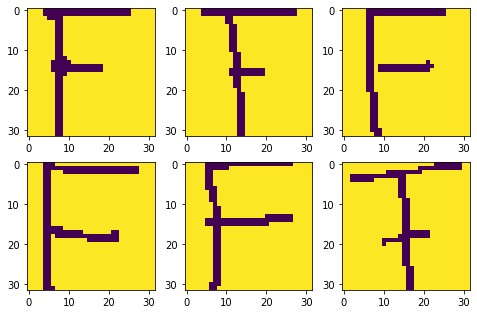

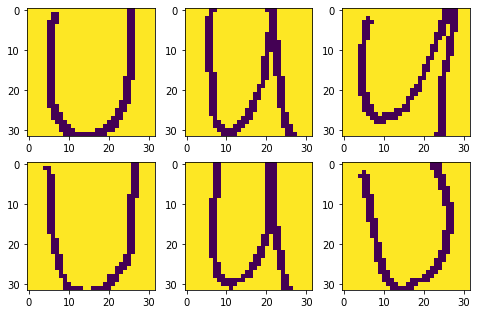

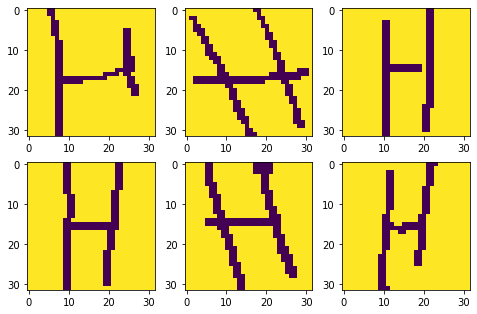

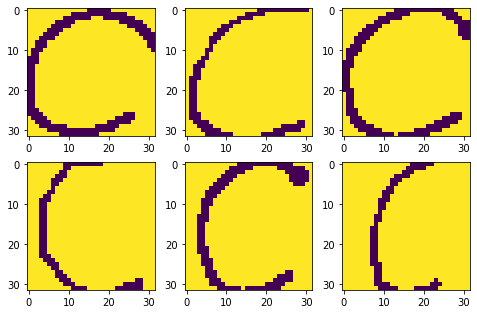

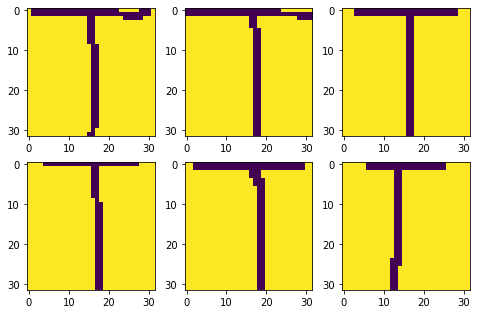

In [69]:
random_letters = np.random.choice(26,size=5,replace=False)
for i in random_letters:
    print(i, eng_indices[i])
    plot_images(eng_indices[i],X['english'])

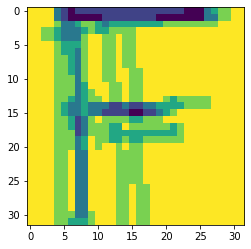

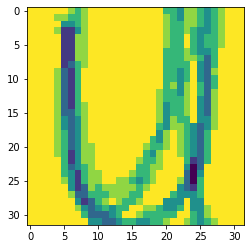

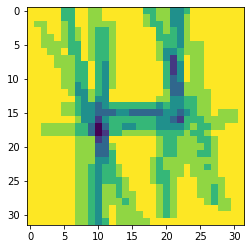

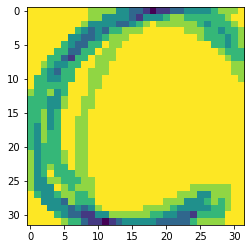

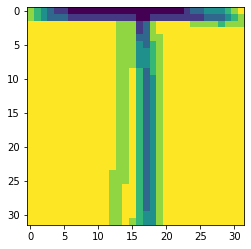

In [72]:
'''Here is what plotting the centroids looks like for each of these letter clusters'''
for i in random_letters:
    cent = generate_centroid(eng_indices[i],X['english'])
    plt.imshow(cent.reshape(32,32))
    plt.show()

In [ ]:
'''Now, let's run some clustering and see what happens'''